# Análise Exploratória de Dados com Pandas


In [1]:
import pandas as pd

## Parte 1 -Coleta e Preparação de Dados


### Criar DataFrames com base no Datasets


In [2]:
# carregar Dataframe de Clientes (customers)------
df_customers = pd.read_csv("./datasets/churn_customers.csv")

In [3]:
# mostrar 7 primeiros registros do DataFrame
df_customers.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [4]:
# mostrar 7 últimos registros do DataFrame
df_customers.tail(5)

,customerID,gender,SeniorCitizen,Partner,Dependents
7038,6840-RESVB,Male,0,Yes,Yes
7039,2234-XADUH,Female,0,Yes,Yes
7040,4801-JZAZL,Female,0,Yes,Yes
7041,8361-LTMKD,Male,1,Yes,No
7042,3186-AJIEK,Male,0,No,No


In [5]:
# exibir informações gerais do DataFrame e sua estrutura
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [6]:
# carregar Dataframe de Serviços (services)
df_services = pd.read_csv("./datasets/churn_services.csv")
# exibir informações gerais do DataFrame e sua estrutura
df_services.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        7043 non-null   object
 1   PhoneService      7043 non-null   object
 2   MultipleLines     7043 non-null   object
 3   InternetService   7043 non-null   object
 4   OnlineSecurity    7043 non-null   object
 5   OnlineBackup      7043 non-null   object
 6   DeviceProtection  7043 non-null   object
 7   TechSupport       7043 non-null   object
 8   StreamingTV       7043 non-null   object
 9   StreamingMovies   7043 non-null   object
dtypes: object(10)
memory usage: 550.4+ KB


In [7]:
# carregar Dataframe de contratos (contracts)
df_contracts = pd.read_csv("./datasets/churn_contracts.csv")
# exibir informações gerais do DataFrame e sua estrutura
df_contracts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   Contract          7043 non-null   object 
 3   PaperlessBilling  7043 non-null   object 
 4   PaymentMethod     7043 non-null   object 
 5   MonthlyCharges    7043 non-null   float64
 6   TotalCharges      7043 non-null   object 
 7   Churn             7043 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 440.3+ KB


### Transformar de Dados


In [8]:
# transformar coluna TotalCharges de String para Float - abordagem 1 com "astype"
# df_contracts["TotalCharges"] = df_contracts["TotalCharges"].astype(float)
# df_contracts.info()

In [9]:
# transformar coluna TotalCharges de String para Float - abordagem 2 com "to_numeric"
# df_contracts["TotalCharges"] = pd.to_numeric(df_contracts["TotalCharges"])
# df_contracts.info()

In [10]:
# transformar coluna TotalCharges de String para Float - abordagem 3 com "to_numeric" com "coerce"
df_contracts["TotalCharges"] = pd.to_numeric(
    df_contracts["TotalCharges"], errors="coerce"
)
df_contracts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   Contract          7043 non-null   object 
 3   PaperlessBilling  7043 non-null   object 
 4   PaymentMethod     7043 non-null   object 
 5   MonthlyCharges    7043 non-null   float64
 6   TotalCharges      7032 non-null   float64
 7   Churn             7043 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 440.3+ KB


In [11]:
# a coluna TotalCharges passou a ter 11 valores ausentes
print((df_contracts["TotalCharges"] == " ").sum())

0


### Renomear Colunas


In [12]:
# Renomear coluna de um DataFrame com método de dicionário, aplicando o resultado de forma direta
df_customers.rename(columns={"SeniorCitizen": "Above65yo"}, inplace=True)
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7043 non-null   object
 1   gender      7043 non-null   object
 2   Above65yo   7043 non-null   int64 
 3   Partner     7043 non-null   object
 4   Dependents  7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [13]:
# Renomear colunas de um DataFrame usando lógica de listas
df_customers.columns = [
    "IDCliente",
    "Genero",
    "Maior65anos",
    "TemParceiro",
    "TemDependentes",
]
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   IDCliente       7043 non-null   object
 1   Genero          7043 non-null   object
 2   Maior65anos     7043 non-null   int64 
 3   TemParceiro     7043 non-null   object
 4   TemDependentes  7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


### Unificar Datasets


In [14]:
# contar quantidade de registros por DataFrame - compararação entre Dataframes
print(len(df_customers), len(df_contracts), len(df_services))

7043 7043 7043


In [15]:
# renomear coluna com 'inplace'
df_services.rename(columns={"customerID": "IDCliente"}, inplace=True)
df_services.head(2)

,IDCliente,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,Yes,No,DSL,Yes,No,Yes,No,No,No


In [16]:
# renomear coluna com 'inplace'
df_contracts.rename(columns={"customerID": "IDCliente"}, inplace=True)
df_contracts.head(2)

,IDCliente,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,One year,No,Mailed check,56.95,1889.50,No


In [17]:
# unificar DataFrame de Customers com Services, usar IDCustomers como referencia
df_temp_01 = df_customers.merge(df_services, on=["IDCliente"])
df_temp_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   IDCliente         7043 non-null   object
 1   Genero            7043 non-null   object
 2   Maior65anos       7043 non-null   int64 
 3   TemParceiro       7043 non-null   object
 4   TemDependentes    7043 non-null   object
 5   PhoneService      7043 non-null   object
 6   MultipleLines     7043 non-null   object
 7   InternetService   7043 non-null   object
 8   OnlineSecurity    7043 non-null   object
 9   OnlineBackup      7043 non-null   object
 10  DeviceProtection  7043 non-null   object
 11  TechSupport       7043 non-null   object
 12  StreamingTV       7043 non-null   object
 13  StreamingMovies   7043 non-null   object
dtypes: int64(1), object(13)
memory usage: 770.5+ KB


In [18]:
df_temp_01.head(3)

,IDCliente,Genero,Maior65anos,TemParceiro,TemDependentes,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No


In [19]:
df_churn_temp = df_temp_01.merge(
    df_contracts, left_on=["IDCliente"], right_on=["IDCliente"]
)
df_churn_temp.info()
df_churn_temp.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   IDCliente         7043 non-null   object 
 1   Genero            7043 non-null   object 
 2   Maior65anos       7043 non-null   int64  
 3   TemParceiro       7043 non-null   object 
 4   TemDependentes    7043 non-null   object 
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  tenure            7043 non-null   int64  
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,IDCliente,Genero,Maior65anos,TemParceiro,TemDependentes,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,...,No,No,No,1,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,...,No,No,No,34,One year,No,Mailed check,56.95,1889.50,No


In [20]:
# unificar os três dataframes
df_churn = df_customers.merge(df_services, on=["IDCliente"]).merge(
    df_contracts, left_on=["IDCliente"], right_on=["IDCliente"]
)
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   IDCliente         7043 non-null   object 
 1   Genero            7043 non-null   object 
 2   Maior65anos       7043 non-null   int64  
 3   TemParceiro       7043 non-null   object 
 4   TemDependentes    7043 non-null   object 
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  tenure            7043 non-null   int64  
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Parte 2 - Lidando com Valores Ausentes


### Detecção de Valores Ausentes


In [21]:
# transformar coluna TotalCharges de String para Float - abordagem 3 com "to_numeric" com "coerce"
df_churn["TotalCharges"] = pd.to_numeric(
    df_contracts["TotalCharges"], errors="coerce")
# Detectar valores ausentes em todas as colunas
df_churn.isna().sum()

IDCliente            0
Genero               0
Maior65anos          0
TemParceiro          0
TemDependentes       0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
tenure               0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [22]:
# detectar valores ausente de uma única coluna
df_churn["TotalCharges"].isna().sum()

11

In [23]:
# detectar quantas linhas tem pelo menos 1 valor ausente (NaN)
df_churn[df_churn.isna().any(axis=1)]

,IDCliente,Genero,Maior65anos,TemParceiro,TemDependentes,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,...,Yes,Yes,No,0,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,0,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,...,No,Yes,Yes,0,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,0,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,No,No phone service,DSL,Yes,Yes,...,Yes,Yes,No,0,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,0,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,0,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,0,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,0,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,Yes,Yes,DSL,No,Yes,...,Yes,Yes,No,0,Two year,No,Mailed check,73.35,NaN,No


In [24]:
# Quantas colunas têm pelo menos 1 valor ausente ([TotalCharges])
df_churn.isna().any(axis=0).sum()

1

### Remover Valores Ausentes


In [25]:
# Remover de forma direta e específica a coluna com valores ausentes
df_churn.drop(columns=["TotalCharges"], axis=1)

,IDCliente,Genero,Maior65anos,TemParceiro,TemDependentes,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,1,Month-to-month,Yes,Electronic check,29.85,No
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,34,One year,No,Mailed check,56.95,No
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,2,Month-to-month,Yes,Mailed check,53.85,Yes
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,45,One year,No,Bank transfer (automatic),42.30,No
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,2,Month-to-month,Yes,Electronic check,70.70,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,24,One year,Yes,Mailed check,84.80,No
7039,2234-XADUH,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,72,One year,Yes,Credit card (automatic),103.20,No
7040,4801-JZAZL,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,11,Month-to-month,Yes,Electronic check,29.60,No
7041,8361-LTMKD,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,4,Month-to-month,Yes,Mailed check,74.40,Yes


In [26]:
# Remover colunas com valores ausentes
df_churn.dropna(axis=1)

,IDCliente,Genero,Maior65anos,TemParceiro,TemDependentes,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,1,Month-to-month,Yes,Electronic check,29.85,No
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,34,One year,No,Mailed check,56.95,No
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,2,Month-to-month,Yes,Mailed check,53.85,Yes
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,45,One year,No,Bank transfer (automatic),42.30,No
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,2,Month-to-month,Yes,Electronic check,70.70,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,24,One year,Yes,Mailed check,84.80,No
7039,2234-XADUH,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,72,One year,Yes,Credit card (automatic),103.20,No
7040,4801-JZAZL,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,11,Month-to-month,Yes,Electronic check,29.60,No
7041,8361-LTMKD,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,4,Month-to-month,Yes,Mailed check,74.40,Yes


In [27]:
# Remover linhas com valores ausentes
df_churn.dropna(axis=0)

,IDCliente,Genero,Maior65anos,TemParceiro,TemDependentes,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,...,No,No,No,1,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,...,No,No,No,34,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,...,No,No,No,2,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,...,Yes,No,No,45,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,...,No,No,No,2,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,...,Yes,Yes,Yes,24,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,72,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,...,No,No,No,11,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,...,No,No,No,4,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [28]:
# Remover linhas com todos os valores ausentes
df_churn.dropna(axis=0, how="all")

,IDCliente,Genero,Maior65anos,TemParceiro,TemDependentes,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,...,No,No,No,1,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,...,No,No,No,34,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,...,No,No,No,2,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,...,Yes,No,No,45,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,...,No,No,No,2,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,...,Yes,Yes,Yes,24,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,72,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,...,No,No,No,11,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,...,No,No,No,4,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


### Imputação de Valores Ausentes


In [29]:
# Preencher todos os valores ausentes com 0
df_churn.fillna(0)

,IDCliente,Genero,Maior65anos,TemParceiro,TemDependentes,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,...,No,No,No,1,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,...,No,No,No,34,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,...,No,No,No,2,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,...,Yes,No,No,45,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,...,No,No,No,2,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,...,Yes,Yes,Yes,24,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,72,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,...,No,No,No,11,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,...,No,No,No,4,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [30]:
# Preencher valores padrão conforme coluna selecionanda
df_churn.fillna(value={"TotalCharges": 0})

,IDCliente,Genero,Maior65anos,TemParceiro,TemDependentes,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,...,No,No,No,1,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,...,No,No,No,34,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,...,No,No,No,2,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,...,Yes,No,No,45,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,...,No,No,No,2,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,...,Yes,Yes,Yes,24,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,72,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,...,No,No,No,11,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,...,No,No,No,4,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [31]:
# Preencher todos os valores ausentes de uma coluna com a média
media_TotalCharges = df_churn["TotalCharges"].mean()
df_churn.fillna(value={"TotalCharges": media_TotalCharges})

,IDCliente,Genero,Maior65anos,TemParceiro,TemDependentes,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,...,No,No,No,1,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,...,No,No,No,34,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,...,No,No,No,2,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,...,Yes,No,No,45,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,...,No,No,No,2,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,...,Yes,Yes,Yes,24,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,72,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,...,No,No,No,11,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,...,No,No,No,4,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


## Parte 3 - Análise Univariada


Hipóteses:

- a faixa etária do cliente tem uma forte associação com o churn
- Um cliente com menos de 6 meses de contrato é mais propenso ao Churn
- Cliente com contrato mensal é mais propenso ao Churn


### Distribuição em variáveis categóricas


In [32]:
# contar clientes usando a variável Churn como referência
df_churn["Churn"].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [33]:
# identificar valores possíveis (únicos) numa variável DataFrame
df_churn["Churn"].unique()

array(['No', 'Yes'], dtype=object)

In [34]:
# distribuição em porcertagem que abandonaram e continuaram ativos
df_churn["Churn"].value_counts(normalize=True)

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

[Text(0, 0, '5174'), Text(0, 0, '1869')]

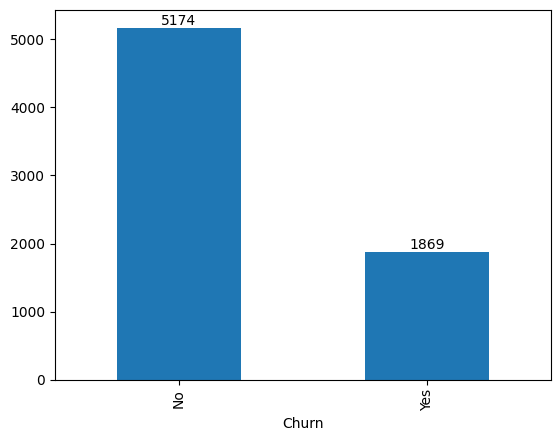

In [35]:
# plot distribuição Churn (quantidade)
ax = df_churn["Churn"].value_counts().plot.bar()
ax.bar_label(ax.containers[0])

[Text(0, 0, '0.73463'), Text(0, 0, '0.26537')]

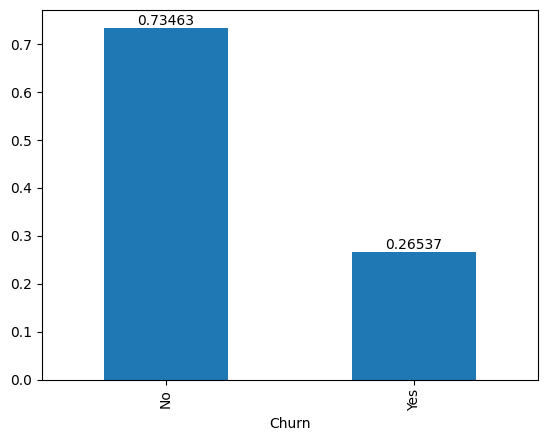

In [36]:
# plot distribuição Churn (percentual)
ax = df_churn["Churn"].value_counts(normalize=True).plot.bar()
ax.bar_label(ax.containers[0])

In [37]:
# Tipos de contrato
df_churn["Contract"].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

[Text(0, 0, '3875'), Text(0, 0, '1695'), Text(0, 0, '1473')]

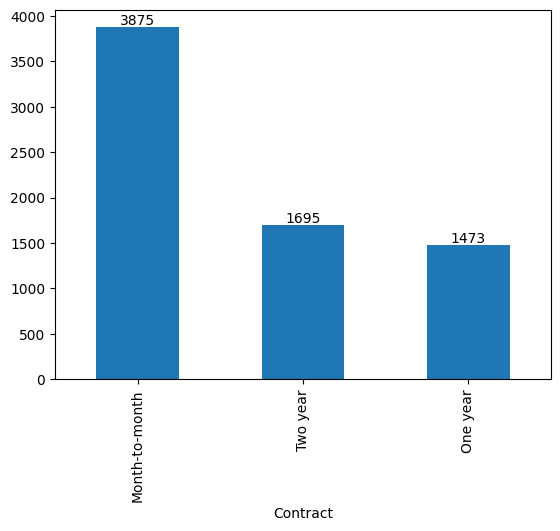

In [38]:
# plot distribuição "Contract" (quantidade)
ax = df_churn["Contract"].value_counts().plot.bar()
ax.bar_label(ax.containers[0])

### Distribuição em variáveis numéricas


<Axes: ylabel='Frequency'>

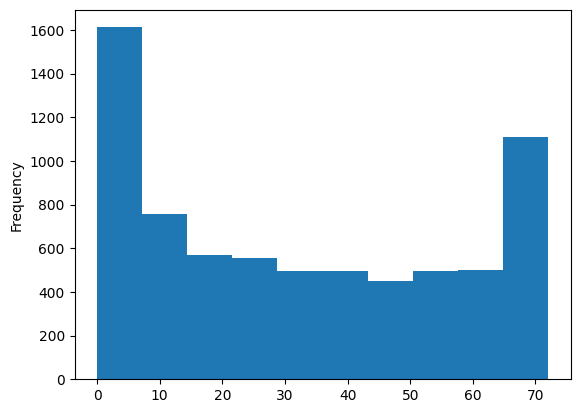

In [39]:
# Histograma do tempo de contrato
df_churn["tenure"].plot.hist()

Análise

- a variável não apresenta visualmente um distribuição do tipo normal
- a a maior parte dos tempos de contrato estão nos extremos


<Axes: ylabel='Frequency'>

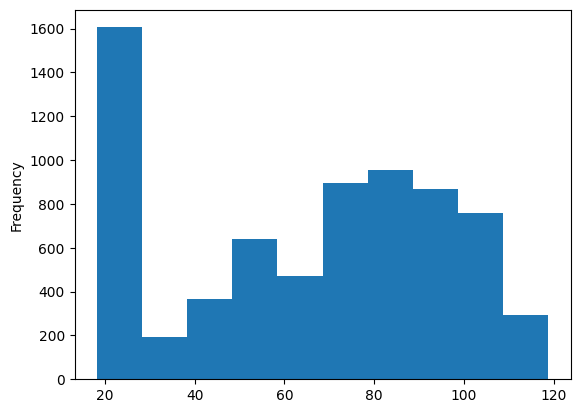

In [40]:
# Histograma do Monthly Charges
df_churn["MonthlyCharges"].plot.hist()
# A maioria dos clientes contrata os pacotes de serviços mais baratos

In [41]:
# média do tempo de contrato (em meses)
df_churn["tenure"].mean()

32.37114865824223

In [42]:
# mediana do tempo de contrato
df_churn["tenure"].median()

29.0

In [43]:
# moda do tempo de contrato (mais frequente)
df_churn["tenure"].mode()

0    1
Name: tenure, dtype: int64

In [44]:
# desvio padrão do tempo de contrato
df_churn["tenure"].std()

24.55948102309446

In [45]:
# coeficiente de variação do tempo de contrato
df_churn["tenure"].std() / df_churn["tenure"].mean() * 100

75.86842617906674

### Filtros e Agrupamentos de Valores


In [46]:
# quantos clientes possuem 1 mês de contrato? Filtro
len(df_churn[(df_churn["tenure"] == 1)])

613

In [47]:
# quantos os clientes de 1 mês de contrato representam percentualmente
one_month_churn = len(
    df_churn[(df_churn["tenure"] == 1)]) / len(df_churn) * 100
print(f"{one_month_churn:.2f} %")

8.70 %


In [48]:
# quantos clientes têm entre 1 e 6 meses de contrato?
one_to_six_month_churn = len(
    df_churn[(df_churn["tenure"] >= 1) & (df_churn["tenure"] <= 6)]
)
one_to_six_month_churn_percent = (
    len(df_churn[(df_churn["tenure"] >= 1) & (df_churn["tenure"] <= 6)])
    / len(df_churn)
    * 100
)
print(
    f"{one_to_six_month_churn} clientes, equivalente a {one_to_six_month_churn_percent:.2f} % do total."
)

1470 clientes, equivalente a 20.87 % do total.


In [49]:
# quantos clientes do sexo masculino têm entre 1 e 6 meses de contrato?
one_to_six_month_male = len(
    df_churn[(df_churn["Genero"] == "Male") & (df_churn["tenure"] <= 6)]
)
one_to_six_month_male_percent = (
    len(df_churn[(df_churn["Genero"] == "Male") & (df_churn["tenure"] <= 6)])
    / len(df_churn)
    * 100
)
print(
    f"{one_to_six_month_male} clientes são do sexo masculino, equivalente a {one_to_six_month_male_percent:.2f} % do total."
)

746 clientes são do sexo masculino, equivalente a 10.59 % do total.


In [50]:
# Apresentar a quantidade de clientes por tempo de contrato - agrupamento com sumarização
df_churn.groupby(["tenure"])["tenure"].count().sort_values(ascending=False)

tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

<Axes: ylabel='tenure'>

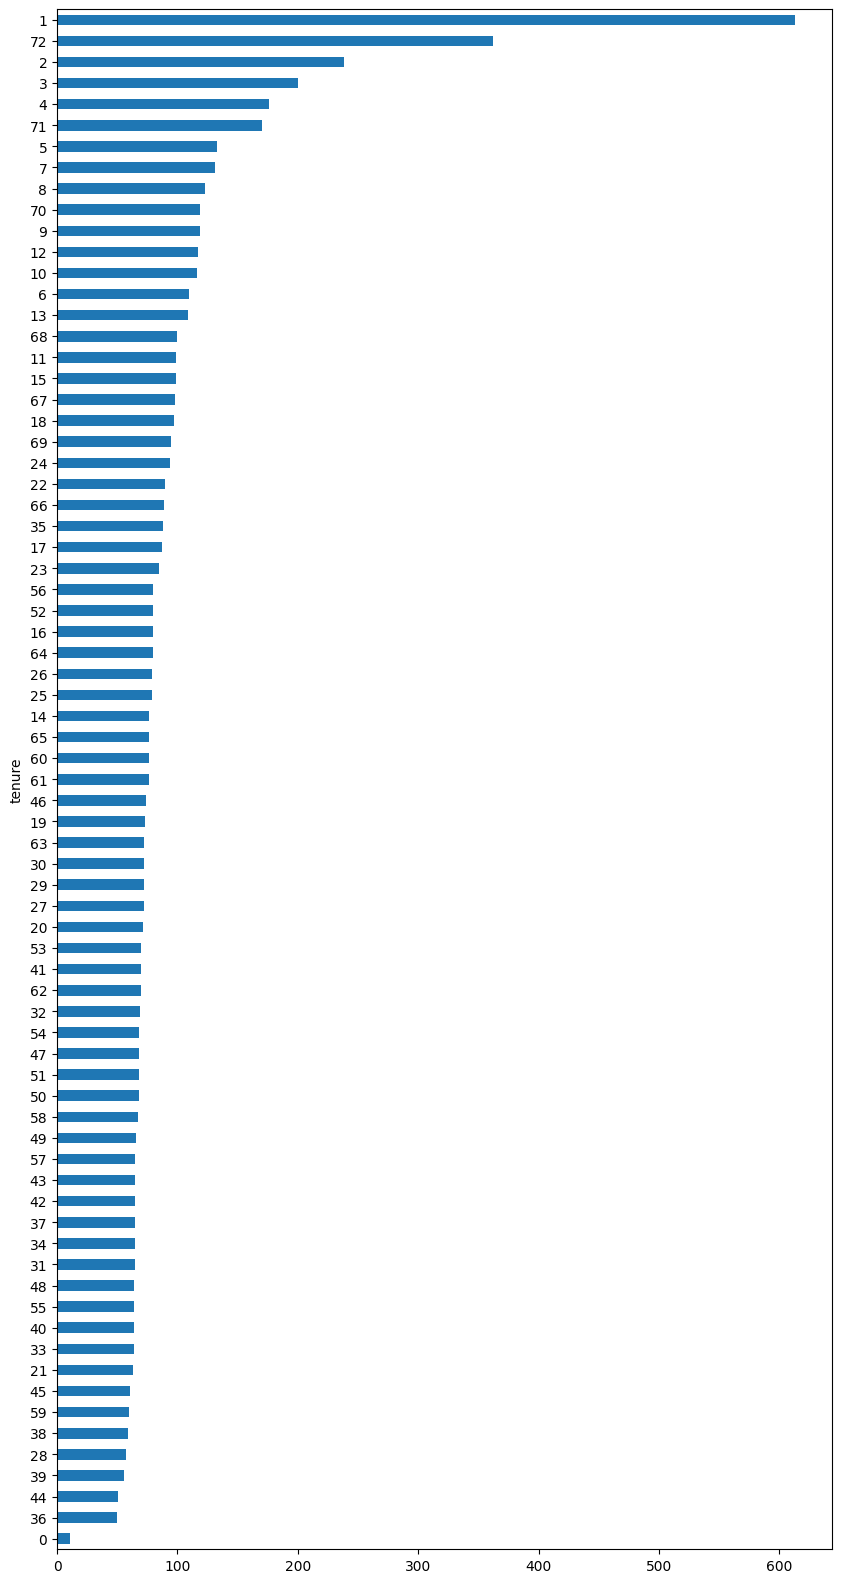

In [51]:
# Apresentar a mesma lógica da célular anterior em um plot
df_churn.groupby(["tenure"])["tenure"].count(
).sort_values().plot.barh(figsize=(10, 20))

## Parte 4 - Análise Bivariada


### Tabela de Contingência


In [52]:
# Hipótese: Clientes com contrato tipo mensal são mais propensos ao Churn
# constrir tabela de contingência entre tipo de contrato e churn
pd.crosstab(df_churn["Churn"], df_churn["Contract"],
            margins=True, margins_name="Total")

Contract,Month-to-month,One year,Two year,Total
Churn,,,,
No,2220,1307,1647,5174
Yes,1655,166,48,1869
Total,3875,1473,1695,7043


In [53]:
# constrir tabela de contingência entre tipo de contrato e churn - proporção
pd.crosstab(
    df_churn["Churn"],
    df_churn["Contract"],
    normalize="index",
    margins=True,
    margins_name="Total",
)

Contract,Month-to-month,One year,Two year
Churn,,,
No,0.429068,0.252609,0.318322
Yes,0.885500,0.088818,0.025682
Total,0.550192,0.209144,0.240664


Considerando o público total, os clientes de contrato mensal, represemtam 55%. Porém se considerarmos apenas os clientes que abandoram o serviço, 88% tinham o contrato mensal. Desta forma, podemos afirmar que há uma correlação entre o tipo de contrato mensal e o abandono.


### Correlação de variáveis qualitativas


Avaliar a correlação entre duas variáveis categóricas (qualitativas)

- executar um teste de hipótese chamado Chi-Square ou Qui-Quadrado de Pearson
- num teste de hipóteses, duas hipóteses são formuladas
- H0 (hipótese nula): as duas variáveis são independentes
- H1 (hipótese complementar): as duas variáveis são complementares

O teste serve para confirmar ou recusar a hipótese nula (H0). Quando a probablidade de observarmos H0 é inferior a 0.05 (p=value), recusamos a hiótese nula e seguimos com a complementar


In [54]:
# gerar um DF da crosstab (sem totais)
df_crosstab_churn_contract = pd.crosstab(
    df_churn["Churn"], df_churn["Contract"])

In [55]:
# calcular os scores e p-values
from scipy.stats import chi2_contingency

In [56]:
# tupla - lista imutável
chi_scores_churn_contract = chi2_contingency(df_crosstab_churn_contract)
chi_scores_churn_contract

Chi2ContingencyResult(statistic=1184.5965720837926, pvalue=5.863038300673391e-258, dof=2, expected_freq=array([[2846.69175067, 1082.11018032, 1245.198069  ],
       [1028.30824933,  390.88981968,  449.801931  ]]))

In [57]:
# apresentar números decimais sem notação científica
pd.set_option("display.float_format", lambda x: "%.15f" % x)

In [58]:
# criar dataframe com os resultados
scores_churn_contract = pd.Series(chi_scores_churn_contract[0])
pvalues_churn_contract = pd.Series(chi_scores_churn_contract[1])
df_chi_score_churn_contract = pd.DataFrame(
    {"qui2": scores_churn_contract, "p-value": pvalues_churn_contract}
)
df_chi_score_churn_contract

,qui2,p-value
0,1184.596572083792580,0.000000000000000


Conforme teste estatístico (Qui-Square), o p-value <=0.05, desta forma seguimos com a H1. pelo qui2 alto, pode-se afirmar que há uma forte correlação.


### Correlação de variável qualitativa e quantitativa


Avaliar a correleção entre um variável qualitativa quantitativa

- Usar o mesmo teste de qui-scare, com a variável quantitativa já transformafada em qualitativa.

**Hipótese:** Cliente com menos de 6 meses de contrato é mais propenso ao Churn

- Criar um coluna nova no dataframe com base numa condição de outra coluna
- Coluna = "TempoMenor6Meses"


In [74]:
# importar biblioteca
import numpy as np
import matplotlib.pyplot as plt

In [62]:
# criar coluna "TempoMenor6Meses"
df_churn["TempoMenor6Meses"] = np.where(df_churn["tenure"] < 6, "Yes", "No")
df_churn.head()

,IDCliente,Genero,Maior65anos,TemParceiro,TemDependentes,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TempoMenor6Meses
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,...,No,No,1,Month-to-month,Yes,Electronic check,29.850000000000001,29.850000000000001,No,Yes
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,...,No,No,34,One year,No,Mailed check,56.950000000000003,1889.500000000000000,No,No
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,...,No,No,2,Month-to-month,Yes,Mailed check,53.850000000000001,108.150000000000006,Yes,Yes
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,...,No,No,45,One year,No,Bank transfer (automatic),42.299999999999997,1840.750000000000000,No,No
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,...,No,No,2,Month-to-month,Yes,Electronic check,70.700000000000003,151.650000000000006,Yes,Yes


In [64]:
# gerar uma crosstab (sem totais)
df_crosstab_churn_tenure = pd.crosstab(
    df_churn["Churn"], df_churn["TempoMenor6Meses"])
df_crosstab_churn_tenure.head()

TempoMenor6Meses,No,Yes
Churn,,
No,4547,627
Yes,1125,744


In [65]:
# calcular os scores
chi_scores_churn_tenure = chi2_contingency(df_crosstab_churn_tenure)
chi_scores_churn_tenure

Chi2ContingencyResult(statistic=669.7216158287102, pvalue=1.1485390172689518e-147, dof=1, expected_freq=array([[4166.82209286, 1007.17790714],
       [1505.17790714,  363.82209286]]))

In [66]:
# criar dataframe com os resultados
scores_churn_tenure = pd.Series(chi_scores_churn_tenure[0])
pvalues_churn_tenure = pd.Series(chi_scores_churn_tenure[1])
df_chi_score_churn_tenure = pd.DataFrame(
    {"qui2": scores_churn_tenure, "p-value": pvalues_churn_tenure}
)
df_chi_score_churn_tenure

,qui2,p-value
0,669.721615828710242,0.000000000000000


Conforme teste estatístico (Qui-Square), o p-value <=0.05, desta forma seguimos com a H1. pelo qui2 alto, pode-se afirmar que há uma forte correlação. Vale mencionar que o qui2 é menor, logo a correlação é menor do que a anterior.


### Correlação de variáveis quantitativas


In [67]:
# Correlação entre 2 variáveis (tenure e TotalCharges)
# Hipótese: quanto maior o tempo de contrato, maior o valor pago (correlação positiva)
df_churn["tenure"].corr(df_churn["TotalCharges"])

0.8258804609332018

In [68]:
# correlação entre 2 variáveis numéricas - Spearman's correlation
df_churn["tenure"].corr(df_churn["TotalCharges"], method="spearman")

0.8891770805365491

validação da hipótese: há uma forte correlação entre Tenure e TotalCharges, usando métodos estatísticos de correlação


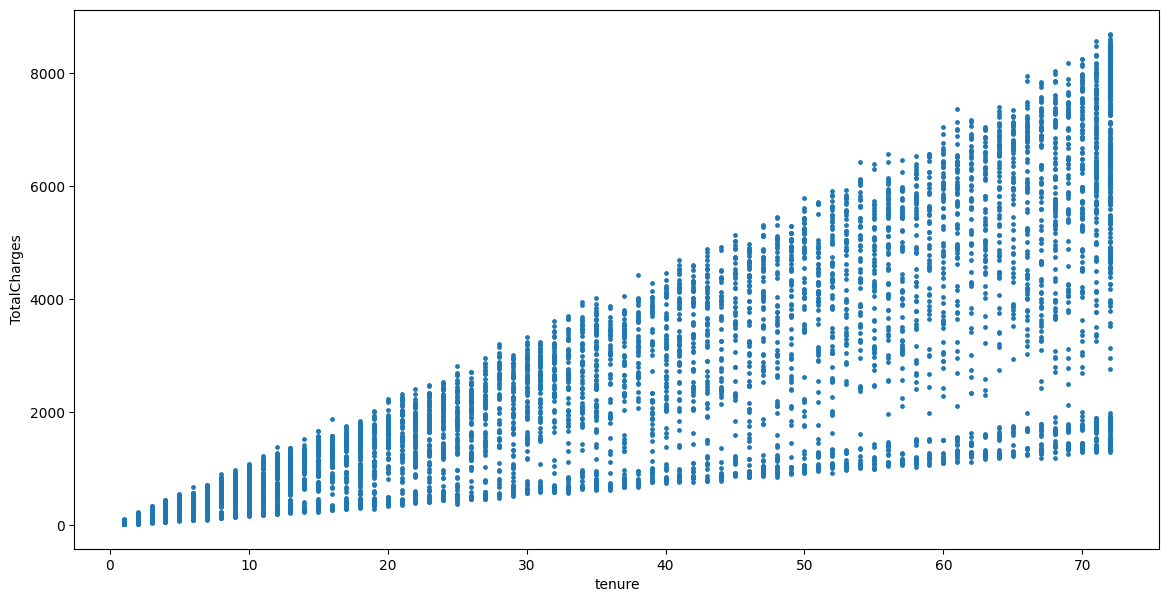

In [83]:
# apresentar plot scatter (gráfico de dispersão) entre essas features
fig, ax = plt.subplots(figsize=(14, 7))
df_churn.plot.scatter(x="tenure", y="TotalCharges", s=6, ax=ax)
plt.show()

Proposição de desafios

- **Desafio 1:** validar a primeira hipótese de que a faixa etária do cliente tem uma forte associação com o Churn
- **Desafio 2:** validar com testes de hipótese se contrato mensal está mais propenso ao Churn


## Parte 5 - Lidando com _Outlayers_ (Valores atípicos)


### Preparação de DataFrame


<Axes: >

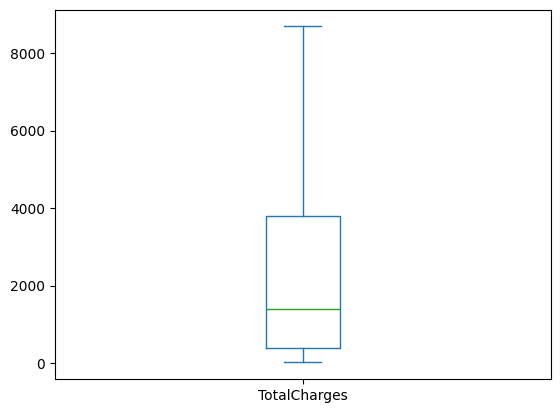

In [90]:
# remover valores nulos e exibir boxplot
df_churn.dropna(axis=0, inplace=True)
df_churn["TotalCharges"].plot.box()

TotalCharges    Axes(0.125,0.11;0.775x0.77)
dtype: object

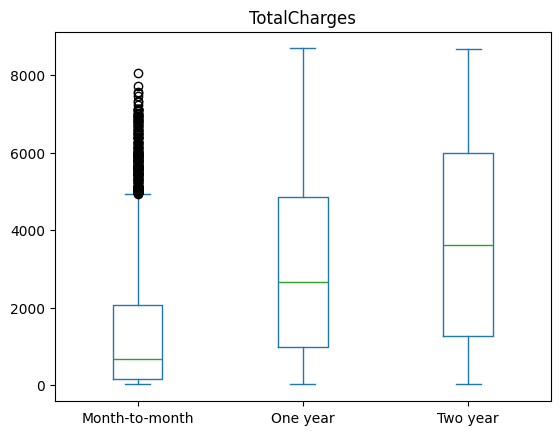

In [91]:
# boxplot agrupado por Contract
df_churn.plot.box(column="TotalCharges", by="Contract")

In [93]:
# criar um DataFrame somente com clientes do tipo Month to Month (Contrato Mensal)
df_churn_month = df_churn[df_churn["Contract"] == "Month-to-month"]
df_churn_month.head()

,IDCliente,Genero,Maior65anos,TemParceiro,TemDependentes,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TempoMenor6Meses
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,...,No,No,1,Month-to-month,Yes,Electronic check,29.850000000000001,29.850000000000001,No,Yes
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,...,No,No,2,Month-to-month,Yes,Mailed check,53.850000000000001,108.150000000000006,Yes,Yes
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,...,No,No,2,Month-to-month,Yes,Electronic check,70.700000000000003,151.650000000000006,Yes,Yes
5,9305-CDSKC,Female,0,No,No,Yes,Yes,Fiber optic,No,No,...,Yes,Yes,8,Month-to-month,Yes,Electronic check,99.650000000000006,820.500000000000000,Yes,No
6,1452-KIOVK,Male,0,No,Yes,Yes,Yes,Fiber optic,No,Yes,...,Yes,No,22,Month-to-month,Yes,Credit card (automatic),89.099999999999994,1949.400000000000091,No,No


<Axes: ylabel='Frequency'>

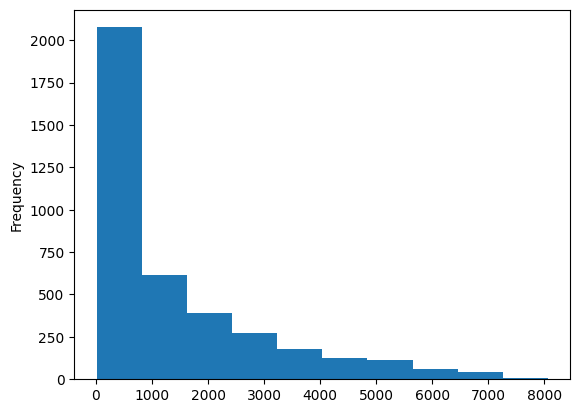

In [94]:
# conferir distribuição normal dos dados com plot de histograma
df_churn_month["TotalCharges"].plot.hist()

### Método Tukey


In [99]:
# Método de Tukey - IQR (Distribuição não Normal)
# IQR - Range Interquartil
# IQR = 3° quartil - 1° quartil
q1_TotalCharges_month = df_churn_month["TotalCharges"].quantile(0.25)
q3_TotalCharges_month = df_churn_month["TotalCharges"].quantile(0.75)
iqr_TotalCharges_month = q3_TotalCharges_month - q1_TotalCharges_month
print(f"U${iqr_TotalCharges_month:.2f}")

U$1906.40


In [104]:
# limites inferir o superior
limInf_TotalCharges_month = q1_TotalCharges_month - \
    (iqr_TotalCharges_month * 1.5)
limSup_TotalCharges_month = q3_TotalCharges_month + \
    (iqr_TotalCharges_month * 1.5)
limInf_TotalCharges_month, limSup_TotalCharges_month

(-2699.5000000000005, 4926.1)

In [112]:
outlayers_tukey = len(
    df_churn_month[
        (df_churn_month["TotalCharges"] < limInf_TotalCharges_month)
        | (df_churn_month["TotalCharges"] > limSup_TotalCharges_month)
    ]
)
print(f"{outlayers_tukey} valores atípicos")

200 valores atípicos


### Método Zscore


In [119]:
# Z-score (Usado para distribuição normal).
# Indica qts desvioes padrões um ponto específico de dados está distante da média
# zscore = (x - media) / desvio padrão
from scipy.stats import zscore

z = np.abs(zscore(df_churn_month["TotalCharges"]))
(z)

0      0.830035854105835
2      0.781512944511796
4      0.754555772515107
5      0.340066014124648
6      0.359519077072167
              ...       
7033   0.778346771186232
7034   3.418910216654943
7035   0.077987048610201
7040   0.633837218378213
7041   0.658532466747594
Name: TotalCharges, Length: 3875, dtype: float64

In [124]:
print(f"{len(df_churn_month[z > 3.0])} registros considerados como outliers")

65 registros considerados como outliers
